In [1]:
%pip install kagglehub
%pip install --upgrade jupyter ipywidgets
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/us-baby-names")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2


# Exploring the dataset

## Frequency of names over the years

In [7]:
def plot_name_occurance_change_over_time(name, dataset, state):
    """
    This function plots a histogram of occurances of a selected name from a selected dataset over the years of monitoring.
    It has 3 parameters:
    name - defines the name of a baby to monitor, expects a string
    dataset - defines the dataset to scan through, expected input is a string either 'National' or 'State'
    state - relevant only if dataset = 'State' and only if we want to monitor name occurances restricted to a single state.
            It expects a string input of the state abbreviation. Here is the list of all possible inputs:
            AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT,
            NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY.
            Or a None input if we do not want to narrow the statistics for a single state.
    """
    file_path_NationalNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_NationalNames = pd.read_csv(file_path_NationalNames)

    file_path_StateNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
    df_StateNames = pd.read_csv(file_path_StateNames)

    plt.figure(figsize=(10, 6))

    if dataset == 'National':
        name_occurances = df_NationalNames[df_NationalNames["Name"] == name] # selecting all occurances of the chosen name
        name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name was given to a baby
        plt.title('Occurrences of the name %s over the years' % (name), fontsize=14)


    if dataset == 'State':
        if state is None:
            name_occurances = df_StateNames[df_StateNames["Name"] == name] # selecting all occurances of the chosen name
            name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name was given to a baby
            plt.title('Occurrences of the name %s over the years' % (name), fontsize=14)

        if state != None:    
            name_occurances = df_StateNames[(df_StateNames["Name"] == name) & (df_StateNames["State"] == state)] # selecting all occurances of the chosen name in the chosen state
            name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name in the chosen state was given to a baby
            plt.title('Occurrences of the name %s over the years in the state %s' % (name, state), fontsize=14)

    
    plt.bar(name_count_per_year.index, name_count_per_year.values, color='lightblue', edgecolor='black')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xticks(ticks=range(min(name_count_per_year.index), max(name_count_per_year.index)+1, 10), rotation=45) # X-axis showing years per decade, rotated by 45 degrees
    # it starts either at the first year of the national dataset, 1880 or the first year of the state dataset, which is 1920
    plt.tight_layout()
    plt.show()

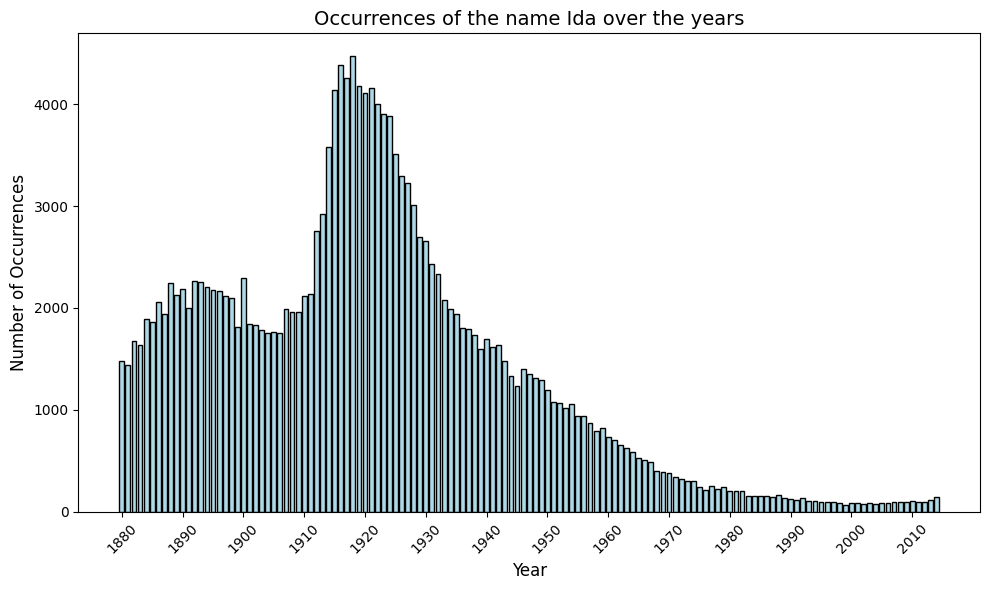

In [8]:
plot_name_occurance_change_over_time(name = 'Ida', dataset = 'National', state = None)

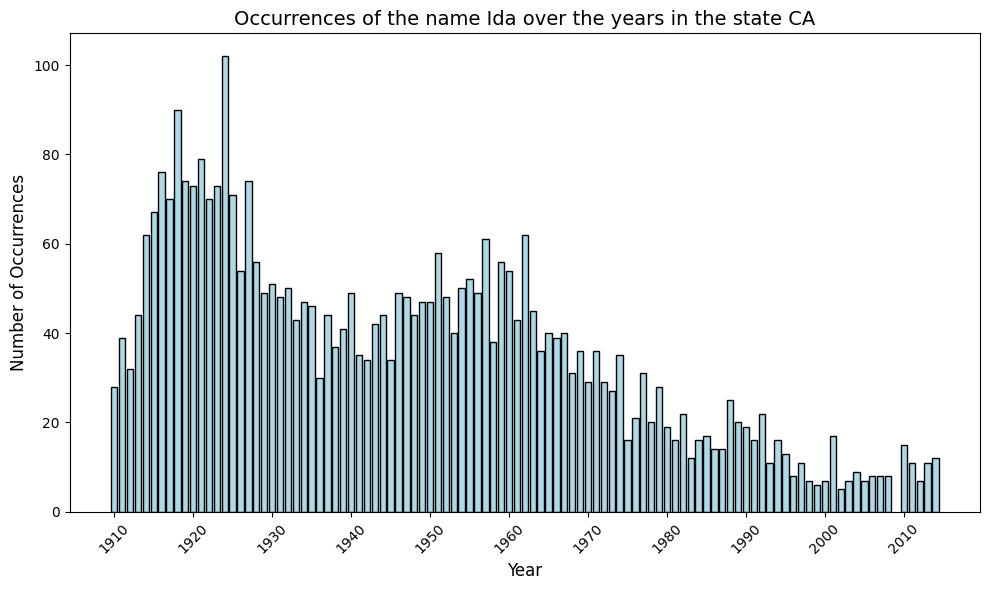

In [9]:
plot_name_occurance_change_over_time(name = 'Ida', dataset = 'State', state = 'CA')

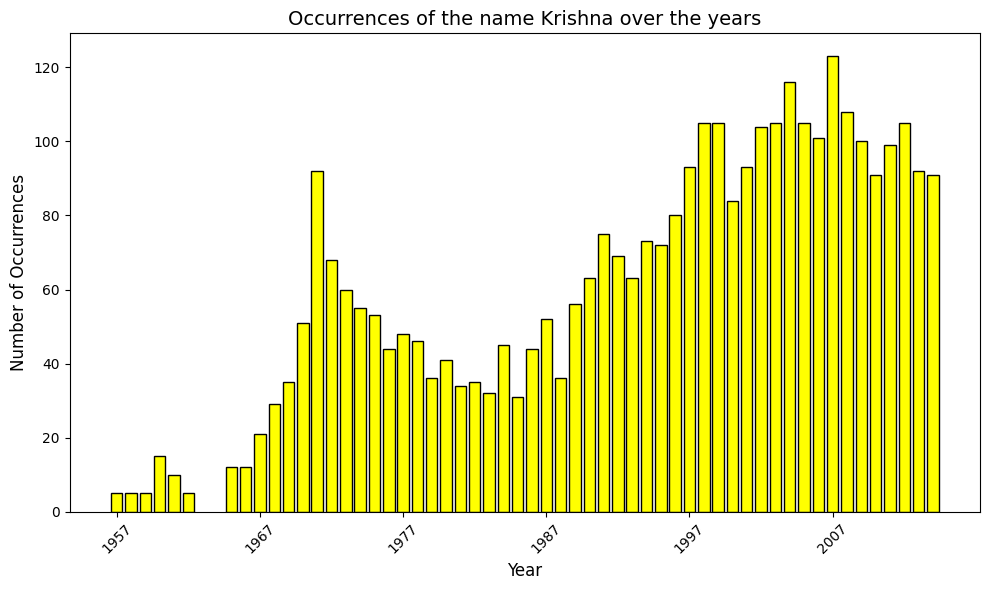

In [26]:

plot_name_occurance_change_over_time(name = 'Krishna', dataset = 'National', state = None)

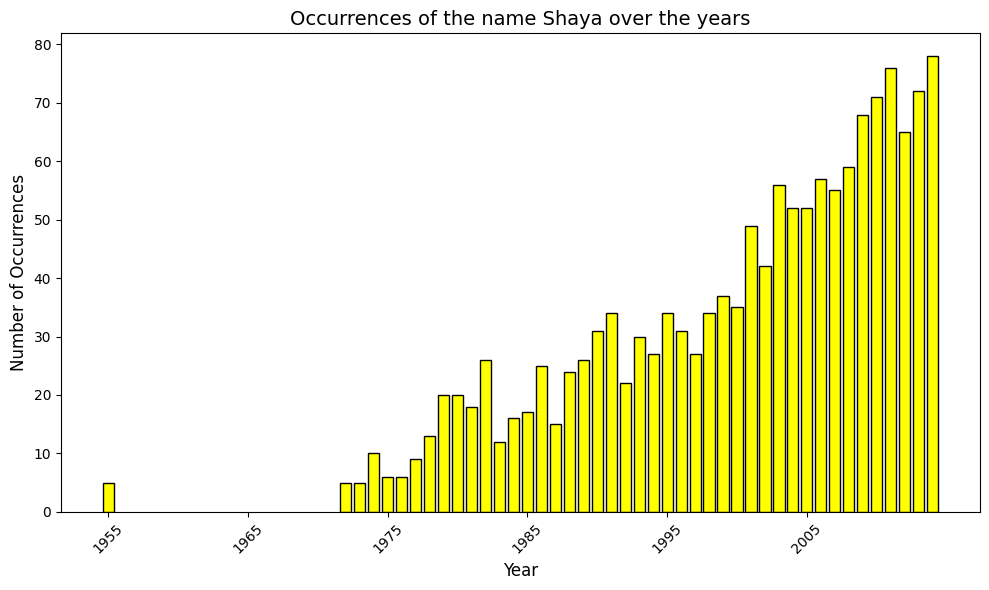

In [27]:
plot_name_occurance_change_over_time(name = 'Shaya', dataset = 'National', state = None)

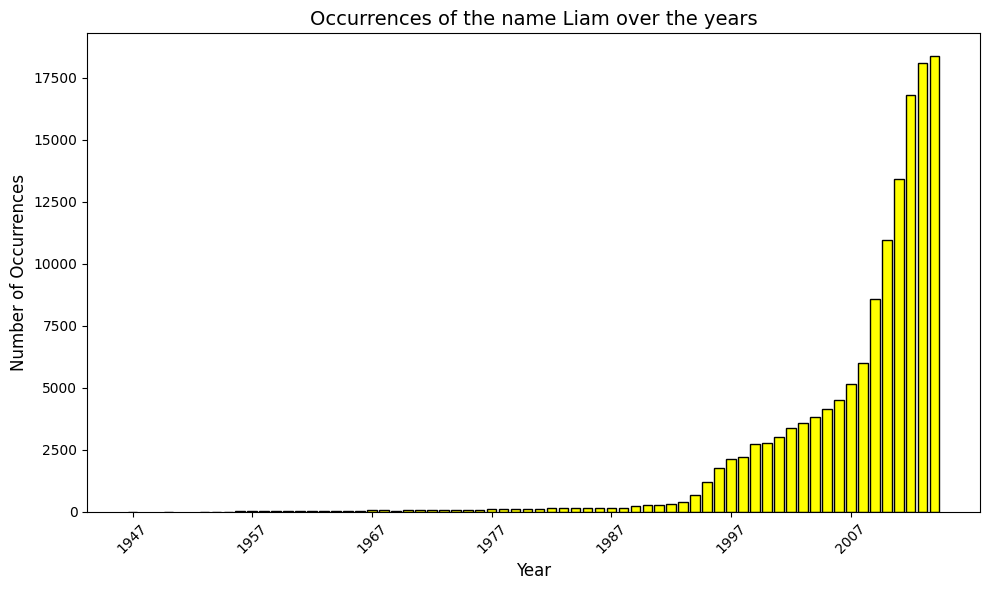

In [213]:

plot_name_occurance_change_over_time(name = 'Liam', dataset = 'National', state = None)

## What name is the most Unisex?

## Preparing the function for Unisex

In [ ]:
def random_most_unisex_name(dataset, minimum_unisex_score, minimum_name_count, printing_the_names):
    """
    The unisexness is not a trivial problem, because while simply finding the names with the exact population of assigned males and females at birth will 
    result in many names with very low occurance. And this is something the start-up and the customer families will definitely take into account. 
    While some people can actually value a very unique name for their baby, most people will want some already established name for their baby.
    I believe this to be the case because we actually observe that the distribution of assigned names for babies is strongly skewed for a subset of
    very popular names - the existance of this phenomena tells me I should factorize this into the function and create a function that can be set 
    with a trade-off on the occurance of the name and its 'unisexness'.

    I quantifty the 'unisexness', U, as U = T / D,  where
    T is the total number of babies of any gender that were assigned the particular name 
    and D is the absolute value of difference between the number of males and females for that particular name.
    So we would get 'unisexness' U = 1 for a baby name that had exactly same number of female and male occurances.

    Next, I take into account the total number of names that were assigned for a particular name. This is defined by a treshold of the minimum
    number of babies with that particular name.

    This function has following parameters:
    dataset - chooosing which dataset we work with, either 'National' or 'State'
    minimum_unisex_score - the function calculates the unisexness of names, which is a float number between 1 (most unisex name, equal occurance of female and male babies with the name) and 0
    minimum_name_count - parameter defining the minimum number of TOTAL names assigned for the baby. It is used to filter out low occuring names
    printing_the_names - if set to True, it prints the resulted filtered unisex names based on our input parameters
    The function returns a random name from the list of most unisex names selected based on the input parameters
    """
    
    if dataset == 'National':
        file_path_NationalNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
        df_Names = pd.read_csv(file_path_NationalNames)

    if dataset == 'State':
        file_path_StateNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
        df_Names = pd.read_csv(file_path_StateNames)

    # Group by Name and Gender, then sum occurrences
    name_gender_counts = df_Names.groupby(["Name", "Gender"])["Count"].sum().unstack(fill_value=0) # makes a 2 column table, name of the baby, female count, male count
    name_gender_counts["Total"] = name_gender_counts["M"] + name_gender_counts["F"] # computes the total number of names, of each gender and adds as a new column to the 2 column table created above
    #name_gender_counts["Difference"] = abs(name_gender_counts["M"] - name_gender_counts["F"]) # computes the difference between the males and females for the same name and adds as a new column
    name_gender_counts["Unisex_score"] = name_gender_counts[["M", "F"]].min(axis=1) / name_gender_counts[["M", "F"]].max(axis=1) # finds for each pair of female and male occurances per name their minimum and maximum value and calculates their ratio.
    
    unisex_names = name_gender_counts[
        (name_gender_counts["M"] > 0) & 
        (name_gender_counts["F"] > 0) & 
        (name_gender_counts["Unisex_score"] >= minimum_unisex_score) & 
        (name_gender_counts["Total"] >= minimum_name_count)
    ] # filters only names within defined tresholds

    unisex_names_sorted = unisex_names.sort_values(by=["Unisex_score", "Total"], ascending=[False, False]) # sorts the selected list by the Unisex_score and for names with the same Unisex_score sorts by the total number of names
    if printing_the_names == True:
        print(unisex_names_sorted)
    random_name = random.choice(unisex_names_sorted.index.tolist())
    return (random_name)

In [95]:
random_most_unisex_name(dataset = 'National', minimum_unisex_score = 0.95,  minimum_name_count = 10000, printing_the_names = True)

Gender       F      M  Total  Unisex_score
Name                                      
Unknown   9283   9140  18423      0.984595
Kerry    48452  49417  97869      0.980472
Kris     13437  13792  27229      0.974260
Ivory     8405   8186  16591      0.973944
Baby      5798   6034  11832      0.960888


'Kerry'

## Which names are common nationally but are rare at the state level?

In [114]:
# Load the National dataset
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
df_national = pd.read_csv(national_file)

# Compute total count of all names nationally
total_national = df_national["Count"].sum()
print(f"Total number of names nationally: {total_national}")

Total number of names nationally: 337135426


In [115]:
# Load the State dataset
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
df_state = pd.read_csv(state_file)

# Compute total count of all names per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index()

# Print results
print(total_per_state)

   State     Count
0     AK    413241
1     AL   5688208
2     AR   3356575
3     AZ   3397260
4     CA  29252805
5     CO   3475550
6     CT   3387873
7     DC   1426777
8     DE    621932
9     FL   9457005
10    GA   8286656
11    HI    958614
12    IA   4137536
13    ID   1162216
14    IL  15304655
15    IN   7237478
16    KS   3241418
17    KY   5393279
18    LA   5597283
19    MA   7632504
20    MD   4521474
21    ME   1391490
22    MI  11734824
23    MN   5627719
24    MO   6852163
25    MS   3994730
26    MT    949578
27    NC   8537298
28    ND   1066892
29    NE   2273426
30    NH    963412
31    NJ   8398176
32    NM   1656420
33    NV    867220
34    NY  23891045
35    OH  14315490
36    OK   4174518
37    OR   2705713
38    PA  16776664
39    RI   1155102
40    SC   4431860
41    SD   1056616
42    TN   6381224
43    TX  21820683
44    UT   2345758
45    VA   6773770
46    VT    549152
47    WA   4699924
48    WI   6139093
49    WV   2976818
50    WY    426209


In [117]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

# Display final DataFrame
print(df_final.head())

  State     Name  Count_State  Percentage_State  Count_National  \
0    AK  Aaliyah          144          0.034846           69917   
1    AK    Aaron         1675          0.405332          557843   
2    AK     Abby           26          0.006292           55582   
3    AK     Abel           21          0.005082           41245   
4    AK  Abigail          716          0.173265          322051   

   Percentage_National  
0             0.020739  
1             0.165466  
2             0.016487  
3             0.012234  
4             0.095526  


In [118]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

# Sort the merged DataFrame by the national percentage in descending order
df_final_sorted = df_final.sort_values(by="Percentage_National", ascending=False)

# Display the sorted DataFrame
print(df_final_sorted.head())

       State   Name  Count_State  Percentage_State  Count_National  \
687       AK  James         6682          1.616974         5129096   
114775    MA  James       128262          1.680471         5129096   
281208    WV  James        75804          2.546477         5129096   
77687     ID  James        14269          1.227741         5129096   
164949    NE  James        32167          1.414913         5129096   

        Percentage_National  
687                1.521376  
114775             1.521376  
281208             1.521376  
77687              1.521376  
164949             1.521376  


In [119]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

### --- FILTER NAMES THAT ARE COMMON NATIONALLY BUT RARE AT STATE LEVEL --- ###

# Set a threshold for national percentage (common names) - e.g., top 10% of names
top_national_threshold = df_final["Percentage_National"].quantile(0.9)  # 90th percentile for national percentage

# Set a threshold for state percentage (rare names) - e.g., bottom 10% of names
bottom_state_threshold = df_final["Percentage_State"].quantile(0.1)  # 10th percentile for state percentage

# Filter for names that are common nationally but rare at the state level
common_national_rare_state = df_final[(df_final["Percentage_National"] >= top_national_threshold) &
                                      (df_final["Percentage_State"] <= bottom_state_threshold)]

# Display the results
print(common_national_rare_state[['Name', 'Percentage_National', 'Percentage_State']].head())

Empty DataFrame
Columns: [Name, Percentage_National, Percentage_State]
Index: []


In [122]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

# Compute relative commonness for national dataset
max_percentage_national = df_national_summary["Percentage_National"].max()
df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

# Compute relative commonness for state dataset (per state)
max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max")
df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

### --- FILTER NAMES THAT ARE COMMON NATIONALLY BUT RARE AT STATE LEVEL --- ###

# Filter for names with high national relative commonness and low state relative commonness
threshold_national = 0.8  # Arbitrary threshold for "high" relative commonness nationally (70% of max)
threshold_state = 0.5  # Arbitrary threshold for "low" relative commonness at the state level (10% of max)

common_national_rare_state = df_final[(df_final["Relative_Commonness_National"] >= threshold_national) &
                                      (df_final["Relative_Commonness_State"] <= threshold_state)]

# Display the results
print(common_national_rare_state[['Name', 'Relative_Commonness_National', 'Relative_Commonness_State']].head())

          Name  Relative_Commonness_National  Relative_Commonness_State
1082      Mary                      0.805296                   0.487491
6064   Michael                      0.844360                   0.365890
11375  Michael                      0.844360                   0.373674
30345     Mary                      0.805296                   0.359252
56578     Mary                      0.805296                   0.471402


In [126]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

# Compute relative commonness for national dataset
max_percentage_national = df_national_summary["Percentage_National"].max()
df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

# Compute relative commonness for state dataset (per state)
max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max")
df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

### --- FILTER NAMES THAT ARE COMMON NATIONALLY BUT RARE AT STATE LEVEL --- ###

# Filter for names with high national relative commonness and low state relative commonness
threshold_national = 0.8  # Arbitrary threshold for "high" relative commonness nationally (70% of max)
threshold_state = 0.5  # Arbitrary threshold for "low" relative commonness at the state level (10% of max)

common_national_rare_state = df_final[(df_final["Relative_Commonness_National"] >= threshold_national) &
                                      (df_final["Relative_Commonness_State"] <= threshold_state)]

# Sort the result by relative commonness nationally (in descending order)
common_national_rare_state_sorted = common_national_rare_state.sort_values(by='Relative_Commonness_National', ascending=False)

# Display the sorted results
print(common_national_rare_state_sorted[['Name', 'Relative_Commonness_National', 'Relative_Commonness_State']])

           Name  Relative_Commonness_National  Relative_Commonness_State
6064    Michael                      0.844360                   0.365890
11375   Michael                      0.844360                   0.373674
66461   Michael                      0.844360                   0.484159
237465  Michael                      0.844360                   0.423021
158567  Michael                      0.844360                   0.448366
148973  Michael                      0.844360                   0.305028
104240  Michael                      0.844360                   0.431500
228722  Michael                      0.844360                   0.351372
282066  Michael                      0.844360                   0.451243
1082       Mary                      0.805296                   0.487491
71331      Mary                      0.805296                   0.419951
168046     Mary                      0.805296                   0.434142
30345      Mary                      0.805296      

In [128]:
# File paths (adjust if needed)
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

# Load datasets
df_national = pd.read_csv(national_file)
df_state = pd.read_csv(state_file)

### --- NATIONAL DATASET --- ###
# Compute total births nationally
total_national = df_national["Count"].sum()

# Compute percentage of each name nationally
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100

# Aggregate national data (sum counts per name)
df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()

# Compute relative commonness for national dataset
max_percentage_national = df_national_summary["Percentage_National"].max()
df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national

### --- STATE DATASET --- ###
# Compute total births per state
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})

# Merge total state counts back into df_state
df_state = df_state.merge(total_per_state, on="State")

# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

# Compute relative commonness for state dataset (per state)
max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max")
df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state

### --- MERGE NATIONAL & STATE DATA --- ###
# Merge national and state data into a single DataFrame
df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

### --- FILTER NAMES THAT ARE COMMON NATIONALLY BUT RARE AT STATE LEVEL --- ###

# Filter for names with high national relative commonness and low state relative commonness
threshold_national = 0.8  # Arbitrary threshold for "high" relative commonness nationally (70% of max)
threshold_state = 0.4  # Arbitrary threshold for "low" relative commonness at the state level (10% of max)

common_national_rare_state = df_final[(df_final["Relative_Commonness_National"] >= threshold_national) &
                                      (df_final["Relative_Commonness_State"] <= threshold_state)]

# Sort the result by relative commonness nationally (in descending order)
common_national_rare_state_sorted = common_national_rare_state.sort_values(by='Relative_Commonness_National', ascending=False)

# Display the sorted results, adding a column for state
print(common_national_rare_state_sorted[['Name', 'Relative_Commonness_National', 'Relative_Commonness_State', 'State']])

           Name  Relative_Commonness_National  Relative_Commonness_State State
6064    Michael                      0.844360                   0.365890    AL
11375   Michael                      0.844360                   0.373674    AR
148973  Michael                      0.844360                   0.305028    MS
228722  Michael                      0.844360                   0.351372    SC
30345      Mary                      0.805296                   0.359252    CA
181128     Mary                      0.805296                   0.244779    NV


In [177]:
# Function to find common names nationally but rare at the state level
def find_common_national_rare_state(threshold_national=0.7, threshold_state=0.4, sort_by='national', keep_only_the_lowest_state_per_name=False):
    
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_national = pd.read_csv(national_file)
    state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
    df_state = pd.read_csv(state_file)

    ### --- NATIONAL DATASET --- ###
    total_national = df_national["Count"].sum() # computes the number of all babies born in the national dataset
    df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100 # adding a new column: percentage of each name's occurance in respect to all names
    df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index() # groups together all columns with the same baby name, sums count and percentate for all entries of the same name, finally the .reset_index just makes the Name column again a column and not functioning like an index
    max_percentage_national = df_national_summary["Percentage_National"].max() # finds the percentage of the most occuring name --> needed so we can normalize by it the occurance of all other names
    df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national # adding a new column which is: normalized relative commonness of each name with respect to the most common baby name (values in range of 1 to 0)

    ### --- STATE DATASET --- ###
    total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"}) # comuptes the number of all born babes individually for each state
    df_state = df_state.merge(total_per_state, on="State") # Adds a new column for each name the total number of occurances of its name per state. For now, there are still all entries of each name per individual year of its occurance
    df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100 # adding a new column: percentage of each name's occurance in respect to all names per state
    df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index() # summing 'Count' and 'Percentage_State' of all occurances over multiple years for the same names (this is done per state)
    max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max") # for each state, finds the percentage of the most occuring name and does the normalisation in the same fashion as in national dataset above
    df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state # adding a new column of the relative commonnes of each name with respect to the most occuring name (done individually per state)

    ### --- MERGING NATIONAL & STATE DATASETS --- ###
    df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National")) # putting the national and state data together so the statistics can be compared

    ### --- FILTER NAMES THAT ARE COMMON NATIONALLY BUT RARE AT STATE LEVEL --- ###
    # Filter for names with high national relative commonness and low state relative commonness
    common_national_rare_state = df_final[(df_final["Relative_Commonness_National"] >= threshold_national) &
                                          (df_final["Relative_Commonness_State"] <= threshold_state)]

    ### --- KEEP ONLY THE STATE WITH LOWEST COMMONNESS PER NAME --- ###
    if keep_only_the_lowest_state_per_name == True:
        common_national_rare_state = common_national_rare_state.loc[common_national_rare_state.groupby("Name")["Relative_Commonness_State"].idxmin()]

    # Sort the result based on user input
    if sort_by == 'national':
        common_national_rare_state_sorted = common_national_rare_state.sort_values(by='Relative_Commonness_National', ascending=False)
    elif sort_by == 'state':
        common_national_rare_state_sorted = common_national_rare_state.sort_values(by='Relative_Commonness_State', ascending=False)
    else:
        raise ValueError("Invalid value for 'sort_by'. Please choose either 'national' or 'state'.")
    


    # Return the final sorted DataFrame
    return common_national_rare_state_sorted[['Name', 'Relative_Commonness_National', 'Relative_Commonness_State', 'State']]

In [180]:
# Call the function (example: sorted by national relative commonness)
result = find_common_national_rare_state(threshold_national=0.75, threshold_state=0.65, sort_by='state', keep_only_the_lowest_state_per_name=True)

# Display the results
print(result)

           Name  Relative_Commonness_National  Relative_Commonness_State State
223946    James                      1.000000                   0.626843    RI
235901     John                      0.995612                   0.553058    TN
229297   Robert                      0.939110                   0.512467    SC
179092  William                      0.793779                   0.490660    NM
148973  Michael                      0.844360                   0.305028    MS
181128     Mary                      0.805296                   0.244779    NV


In [152]:
%pip install seaborn
import seaborn as sns

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/294.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
def plot_name_commonness(name):
    """
    Plots the distribution of Relative_Commonness_State for a given name
    and includes Relative_Commonness_National in the title.
    
    Parameters:
    name (str): The name to analyze.
    """

    # Load datasets
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_national = pd.read_csv(national_file)
    state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
    df_state = pd.read_csv(state_file)

    ### --- NATIONAL DATASET --- ###
    total_national = df_national["Count"].sum()
    df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100
    df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()
    max_percentage_national = df_national_summary["Percentage_National"].max()
    df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national

    ### --- STATE DATASET --- ###
    total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"})
    df_state = df_state.merge(total_per_state, on="State")
    df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100
    df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()
    max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max")
    df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state

    ### --- MERGING NATIONAL & STATE DATASETS --- ###
    df_final = df_state_summary.merge(df_national_summary, on="Name", how="left", suffixes=("_State", "_National"))

    ### --- FILTER FOR SPECIFIC NAME --- ###
    name_data = df_final[df_final["Name"] == name]

    if name_data.empty:
        print(f"No data found for the name '{name}'.")
        return

    # Extract Relative_Commonness_National for title
    relative_commonness_national = name_data["Relative_Commonness_National"].iloc[0]

    ### --- PLOT DISTRIBUTION --- ###
    plt.figure(figsize=(10, 5))
    sns.barplot(x="State", y="Relative_Commonness_State", data=name_data, color = 'Blue')
    plt.xticks(rotation=90)
    plt.xlabel("State")
    plt.ylabel("Relative Commonness (State)")
    plt.title(f"Distribution of '{name}' across states\nRelative Commonness National: {relative_commonness_national:.2f}")
    plt.show()

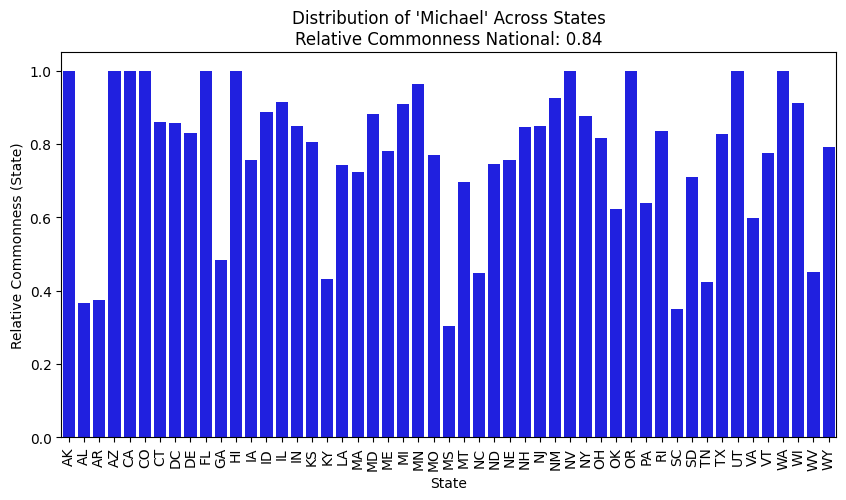

In [182]:
plot_name_commonness(name='Michael')

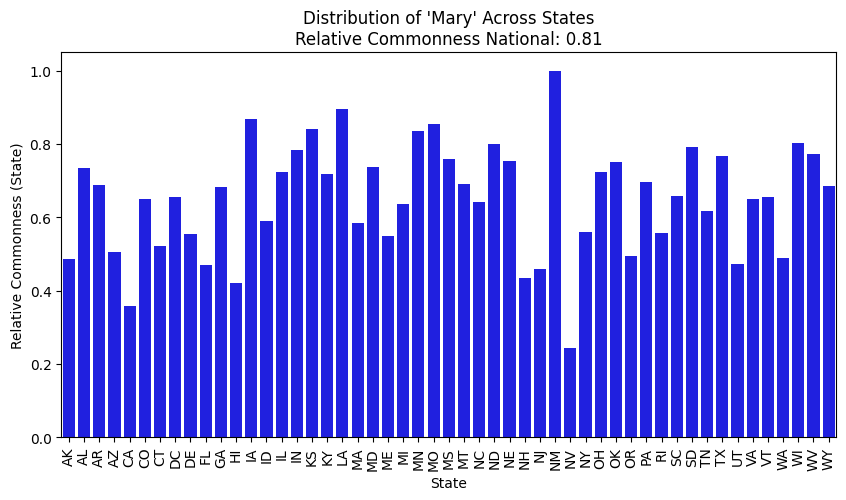

In [183]:
plot_name_commonness(name='Mary')

In [142]:
df_national["Percentage_National"] = (df_national["Count"] / total_national) * 100
#df_national["Percentage_National"]

df_national_summary = df_national.groupby("Name")[["Count", "Percentage_National"]].sum().reset_index()
max_percentage_national = df_national_summary["Percentage_National"].max()
df_national_summary["Relative_Commonness_National"] = df_national_summary["Percentage_National"] / max_percentage_national

df_national_summary

,Name,Count,Percentage_National,Relative_Commonness_National
0,Aaban,72,0.000021,1.403756e-05
1,Aabha,21,0.000006,4.094289e-06
2,Aabid,5,0.000001,9.748307e-07
3,Aabriella,10,0.000003,1.949661e-06
4,Aadam,196,0.000058,3.821336e-05
...,...,...,...,...
93884,Zytavious,43,0.000013,8.383544e-06
93885,Zyvion,5,0.000001,9.748307e-07
93886,Zyyanna,6,0.000002,1.169797e-06
93887,Zyyon,6,0.000002,1.169797e-06


In [147]:
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
df_state = pd.read_csv(state_file)
total_per_state = df_state.groupby("State")["Count"].sum().reset_index().rename(columns={"Count": "Total_State"}) # comuptes the number of all born babes individually for each state
df_state = df_state.merge(total_per_state, on="State")


# Compute percentage of each name per state
df_state["Percentage_State"] = (df_state["Count"] / df_state["Total_State"]) * 100

# Create state summary (sum counts per name, per state)
df_state_summary = df_state.groupby(["State", "Name"])[["Count", "Percentage_State"]].sum().reset_index()

# Compute relative commonness for state dataset (per state)
max_percentage_state_per_state = df_state_summary.groupby("State")["Percentage_State"].transform("max")
df_state_summary["Relative_Commonness_State"] = df_state_summary["Percentage_State"] / max_percentage_state_per_state

# Filter occurrences of the name "Mary"
df_mary = df_state_summary[df_state_summary["Name"] == "Mary"]

# Print all occurrences of "Mary"
print(df_mary)

       State  Name   Count  Percentage_State  Relative_Commonness_State
1082      AK  Mary    3936          0.952471                   0.487491
5942      AL  Mary  115889          2.037355                   0.735850
11274     AR  Mary   58679          1.748181                   0.688656
16508     AZ  Mary   22752          0.669716                   0.506467
30345     CA  Mary  152533          0.521430                   0.359252
40258     CO  Mary   31586          0.908806                   0.649370
44164     CT  Mary   41659          1.229651                   0.523210
46957     DC  Mary   22390          1.569271                   0.654851
48986     DE  Mary    8407          1.351755                   0.555761
56578     FL  Mary   66280          0.700856                   0.471402
66274     GA  Mary  124895          1.507182                   0.682479
71331     HI  Mary    5776          0.602537                   0.419951
75253     IA  Mary   61742          1.492241                   0

In [137]:
def common_national_rare_state(national_file, state_file, min_national_count=5, state_threshold=0.1):
    """
    Finds names that are common nationally but rare at the state level.
    
    Parameters:
    - national_file (str): Path to the National dataset CSV file.
    - state_file (str): Path to the State dataset CSV file.
    - min_national_count (int): Minimum count for a name to be considered 'common' nationally.
    - state_threshold (float): Percentage threshold for a name to be considered 'rare' at the state level.
    
    Returns:
    - DataFrame with names that are common nationally but rare at the state level.
    """
    
    # Load the datasets
    df_national = pd.read_csv(national_file)
    df_state = pd.read_csv(state_file)

    # Aggregate national counts
    national_counts = df_national.groupby("Name")["Count"].sum().reset_index()
    
    # Aggregate state counts (sum over all states)
    state_counts = df_state.groupby("Name")["Count"].sum().reset_index()
    
    # Merge national and state counts
    merged_counts = national_counts.merge(state_counts, on="Name", how="left", suffixes=("_National", "_State"))

    # Fill NaN values (if a name is missing in the state dataset, set state count to 0)
    merged_counts["Count_State"].fillna(0, inplace=True)

    # Filter names that are common nationally but rare at the state level
    filtered_names = merged_counts[
        (merged_counts["Count_National"] >= min_national_count) & 
        (merged_counts["Count_State"] <= merged_counts["Count_National"] * state_threshold)
    ]

    return filtered_names.sort_values(by="Count_National", ascending=False)

# Example Usage:
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

rare_state_names = common_national_rare_state(national_file, state_file, min_national_count=50, state_threshold=0.1)
print(rare_state_names)

           Name  Count_National  Count_State
53965    Linden            4102        384.0
14016    Carlin            4035        284.0
17109    Clarke            3905        373.0
14086    Carman            3465        285.0
64796    Nevada            3461        206.0
...         ...             ...          ...
8018      Ashay              50          0.0
77400  Shareeta              50          0.0
79507    Siller              50          0.0
44210    Kamili              50          0.0
70002     Raimi              50          0.0

[28684 rows x 3 columns]


C:\Users\matej\AppData\Local\Temp\ipykernel_40916\425273555.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_counts["Count_State"].fillna(0, inplace=True)


In [132]:
def common_national_rare_state(national_file, state_file, min_national_count=5000, state_threshold=0.1):
    """
    Finds names that are common nationally but rare at the state level.
    
    Parameters:
    - national_file (str): Path to the National dataset CSV file.
    - state_file (str): Path to the State dataset CSV file.
    - min_national_count (int): Minimum count for a name to be considered 'common' nationally.
    - state_threshold (float): Percentage threshold for a name to be considered 'rare' at the state level.
    
    Returns:
    - DataFrame with names that are common nationally but rare at the state level.
    """
    
    # Load the datasets
    df_national = pd.read_csv(national_file)
    df_state = pd.read_csv(state_file)

    # Aggregate national counts
    national_counts = df_national.groupby("Name")["Count"].sum().reset_index()
    
    # Aggregate state counts (sum over all states)
    state_counts = df_state.groupby("Name")["Count"].sum().reset_index()
    
    # Merge national and state counts
    merged_counts = national_counts.merge(state_counts, on="Name", how="left", suffixes=("_National", "_State"))

    # Fill NaN values (if a name is missing in the state dataset, set state count to 0)
    merged_counts["Count_State"].fillna(0, inplace=True)

    # Filter names that are common nationally but rare at the state level
    filtered_names = merged_counts[
        (merged_counts["Count_National"] >= min_national_count) & 
        (merged_counts["Count_State"] <= merged_counts["Count_National"] * state_threshold)
    ]

    return filtered_names.sort_values(by="Count_National", ascending=False)

# Example Usage:
national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
state_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"

rare_state_names = common_national_rare_state(national_file, state_file, min_national_count=50, state_threshold=0.1)
print(rare_state_names)

           Name  Count_National  Count_State
53965    Linden            4102        384.0
14016    Carlin            4035        284.0
17109    Clarke            3905        373.0
14086    Carman            3465        285.0
64796    Nevada            3461        206.0
...         ...             ...          ...
8018      Ashay              50          0.0
77400  Shareeta              50          0.0
79507    Siller              50          0.0
44210    Kamili              50          0.0
70002     Raimi              50          0.0

[28684 rows x 3 columns]


C:\Users\matej\AppData\Local\Temp\ipykernel_40916\256596151.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_counts["Count_State"].fillna(0, inplace=True)


# Top 10 trending names

In [184]:
def find_top_trending_names(years_to_compare=5):
    """
    Finds the top 10 trending baby names by comparing the growth in name frequency over time.

    Parameters:
    - years_to_compare (int): The number of years to use for calculating past and recent trends.

    Returns:
    - DataFrame: A DataFrame with the top 10 trending names, showing their past and recent average occurrences
      and growth percentage.
    """
    
    # Load National Names dataset
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_national = pd.read_csv(national_file)

    # Find the most recent year and split into two periods
    max_year = df_national["Year"].max()
    recent_years = list(range(max_year - years_to_compare + 1, max_year + 1))  # Last N years
    past_years = list(range(max_year - 2 * years_to_compare + 1, max_year - years_to_compare + 1))  # Previous N years

    # Calculate total occurrences per name in each period
    recent_counts = df_national[df_national["Year"].isin(recent_years)].groupby("Name")["Count"].sum()
    past_counts = df_national[df_national["Year"].isin(past_years)].groupby("Name")["Count"].sum()

    # Merge data and fill missing values (if a name was not present in one period)
    trending_names = pd.DataFrame({"Past_Count": past_counts, "Recent_Count": recent_counts}).fillna(0)

    # Calculate growth rate
    trending_names["Growth_Rate"] = (trending_names["Recent_Count"] - trending_names["Past_Count"]) / (trending_names["Past_Count"] + 1)  # +1 to avoid division by zero

    # Sort by highest growth rate
    trending_names_sorted = trending_names.sort_values(by="Growth_Rate", ascending=False)

    # Get the top 10 trending names
    return trending_names_sorted.head(10).reset_index()

# Example usage:
top_trending = find_top_trending_names()
print(top_trending)

       Name  Past_Count  Recent_Count  Growth_Rate
0  Cataleya         0.0        2037.0       2037.0
1   Daleyza         0.0        1988.0       1988.0
2    Neymar         0.0        1425.0       1425.0
3  Khaleesi         0.0         785.0        785.0
4  Kataleya         0.0         675.0        675.0
5    Jionni         0.0         652.0        652.0
6   Zendaya         0.0         625.0        625.0
7  Cattleya         0.0         377.0        377.0
8    Tahiry         0.0         249.0        249.0
9     Itzae         0.0         234.0        234.0


In [191]:
%pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.1 MB 3.6 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.1 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.1 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.1 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.1 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.1 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.1 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.1 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.1 MB 3.8 MB/s eta 0:00:03
   -----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [192]:
from sklearn.linear_model import LinearRegression

def find_trending_names_by_slope(years_to_analyze=20):
    """
    Finds the top 10 trending baby names by fitting a linear regression model to measure the trend slope.

    Parameters:
    - years_to_analyze (int): The number of years to include in the trend analysis.

    Returns:
    - DataFrame: A DataFrame with the top 10 trending names, showing their trend slope.
    """
    
    # Load National Names dataset
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_national = pd.read_csv(national_file)

    # Find the most recent year
    max_year = df_national["Year"].max()
    min_year = max_year - years_to_analyze + 1  # Earliest year to include in analysis

    # Filter dataset to include only the last N years
    df_filtered = df_national[df_national["Year"] >= min_year]

    # Aggregate name occurrences by year
    df_grouped = df_filtered.groupby(["Name", "Year"])["Count"].sum().reset_index()

    # Prepare storage for trend slopes
    name_trends = []

    # Iterate through each name and fit a regression model
    for name, group in df_grouped.groupby("Name"):
        # Extract years and counts
        X = group["Year"].values.reshape(-1, 1)  # Reshape for sklearn
        y = group["Count"].values

        # Ensure there are enough data points to fit a model
        if len(y) < 2:
            continue  # Skip names with less than 2 years of data

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Store the trend slope (steeper slope = more trending)
        name_trends.append({"Name": name, "Trend_Slope": model.coef_[0]})

    # Convert results to DataFrame
    df_trends = pd.DataFrame(name_trends)

    # Sort by trend slope in descending order (higher slope = more trending)
    df_trends_sorted = df_trends.sort_values(by="Trend_Slope", ascending=False)

    # Get the top 10 trending names
    return df_trends_sorted.head(10).reset_index(drop=True)

# Example usage:
top_trending = find_trending_names_by_slope(20)
print(top_trending)

       Name  Trend_Slope
0    Sophia  1143.447368
1    Jayden  1123.273684
2  Isabella  1099.282707
3       Ava  1095.154887
4     Aiden  1029.331579
5      Liam   861.501504
6     Mason   814.348872
7      Emma   753.494737
8   Daleyza   709.500000
9       Mia   701.004511


In [195]:
def find_trending_names(N=10, alpha=0.7, beta=0.3):
    """
    Finds the top trending baby names based on the rate of increase in occurrences over the past N years,
    adjusted for relative commonness. 
    
    Parameters:
        N (int): Number of years to consider for trend analysis.
        alpha (float): Weight for trendiness (slope influence).
        beta (float): Weight for relative commonness.
    
    Returns:
        DataFrame: Top 10 trending names sorted by a combined score.
    """
    # Load dataset
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_national = pd.read_csv(national_file)
    
    # Get the most recent year in the dataset
    max_year = df_national['Year'].max()
    
    # Filter data for the last N years
    df_recent = df_national[df_national['Year'] >= max_year - (N - 1)]
    
    # Compute total births per year to normalize later
    total_per_year = df_recent.groupby("Year")["Count"].sum().reset_index().rename(columns={"Count": "Total_Year"})
    df_recent = df_recent.merge(total_per_year, on="Year")
    df_recent["Relative_Commonness"] = df_recent["Count"] / df_recent["Total_Year"]
    
    # Get the most common name's relative frequency to normalize commonness
    max_relative_commonness = df_recent.groupby("Year")["Relative_Commonness"].transform("max")
    df_recent["Normalized_Relative_Commonness"] = df_recent["Relative_Commonness"] / max_relative_commonness
    
    # Prepare for trend analysis
    trending_names = []
    for name, group in df_recent.groupby("Name"):
        if len(group) < 2:
            continue  # Skip names with fewer than 2 data points (no trend possible)
        
        # Fit a linear regression model to the name occurrences over time
        X = group["Year"].values.reshape(-1, 1)
        y = group["Count"].values.reshape(-1, 1)
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0][0]  # Extract the trendiness slope
        
        # Compute the average relative commonness of the name over the period
        avg_relative_commonness = group["Normalized_Relative_Commonness"].mean()
        
        # Compute final score
        score = (alpha * slope) + (beta * avg_relative_commonness)
        
        # Append to results
        trending_names.append({
            "Name": name,
            "Trendiness_Slope": slope,
            "Avg_Relative_Commonness": avg_relative_commonness,
            "Final_Score": score
        })
    
    # Convert results to DataFrame and sort by final score
    df_trending = pd.DataFrame(trending_names)
    df_trending = df_trending.sort_values(by="Final_Score", ascending=False).head(10)
    
    return df_trending

In [196]:
find_trending_names(N=10, alpha=0.7, beta=0.3)

,Name,Trendiness_Slope,Avg_Relative_Commonness,Final_Score
26440,Liam,927.393939,0.239700,649.247667
9841,Daleyza,709.500000,0.031688,496.659506
29029,Mason,568.581818,0.313714,398.101387
15772,Harper,558.875758,0.091914,391.240604
36602,Scarlett,474.184211,0.107135,331.961088
33256,Penelope,473.430303,0.088991,331.427909
38205,Sophia,464.339394,0.400280,325.157660
6057,Bentley,390.163636,0.064387,273.133861
8933,Claire,383.574324,0.144392,268.545345
19012,Jaxon,374.309091,0.094004,262.044565


In [204]:
def find_trending_names(N=10, threshold_commonness=0.01):
    # Load dataset
    national_file = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df = pd.read_csv(national_file)
    
    # Filter last N years
    max_year = df["Year"].max()
    df_recent = df[df["Year"] >= max_year - N]
    
    # Compute total occurrences per year
    total_per_year = df_recent.groupby("Year")["Count"].sum().reset_index().rename(columns={"Count": "Total_Year"})
    df_recent = df_recent.merge(total_per_year, on="Year")
    
    # Compute relative commonness per year
    df_recent["Relative_Commonness"] = df_recent["Count"] / df_recent["Total_Year"]
    
    # Compute trendiness slope for each name
    name_trends = []
    for name, group in df_recent.groupby("Name"):
        if len(group) < 2:
            continue  # Skip names that appear in less than 2 years
        
        X = group["Year"].values.reshape(-1, 1)
        y = group["Count"].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0][0]
        
        # Compute average relative commonness
        avg_commonness = group["Relative_Commonness"].mean()
        
        if avg_commonness >= threshold_commonness:
            name_trends.append((name, slope, avg_commonness))
    
    # Convert to DataFrame and sort by trendiness
    df_trends = pd.DataFrame(name_trends, columns=["Name", "Trendiness_Slope", "Avg_Relative_Commonness"])
    df_trends = df_trends.sort_values(by="Trendiness_Slope", ascending=False)
    
    return df_trends.head(N)

find_trending_names(N=10, threshold_commonness=0.01)

,Name,Trendiness_Slope,Avg_Relative_Commonness


In [209]:
def find_trending_names(file_path, N=10, alpha=1.0, threshold_commonness=0.01):
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Filter last N years
    max_year = df["Year"].max()
    df_recent = df[df["Year"] >= max_year - N]
    
    # Compute total occurrences per year
    total_per_year = df_recent.groupby("Year")["Count"].sum().reset_index().rename(columns={"Count": "Total_Year"})
    df_recent = df_recent.merge(total_per_year, on="Year")
    
    # Compute relative commonness per year
    df_recent["Relative_Commonness"] = df_recent["Count"] / df_recent["Total_Year"]
    
    # Compute trendiness slope for each name
    name_trends = []
    for name, group in df_recent.groupby("Name"):
        if len(group) < 2:
            continue  # Skip names that appear in less than 2 years
        
        X = group["Year"].values.reshape(-1, 1)
        y = group["Count"].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0][0]

        
        
        # Compute average relative commonness
        avg_commonness = group["Relative_Commonness"].mean()

        name_trends.append((name, slope, avg_commonness))
        '''
        if avg_commonness >= threshold_commonness:
            name_trends.append((name, slope, avg_commonness))
        '''
    # Convert to DataFrame and sort by trendiness
    df_trends = pd.DataFrame(name_trends, columns=["Name", "Trendiness_Slope", "Avg_Relative_Commonness"])
    df_trends = df_trends.sort_values(by="Trendiness_Slope", ascending=False)
    
    print(df_trends)  # Print the results including relative commonness
    
    return df_trends.head(N)

file_path = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
find_trending_names(file_path, N=10, alpha=1.0, threshold_commonness=0.01)

           Name  Trendiness_Slope  Avg_Relative_Commonness
27094      Liam        849.254545                 0.001344
10063   Daleyza        709.500000                 0.000181
29745     Mason        547.481818                 0.001817
39185    Sophia        509.940909                 0.002318
16154    Harper        502.090909                 0.000498
...         ...               ...                      ...
2012     Alexis       -597.936364                 0.001427
32704  Nicholas       -624.595455                 0.001537
42095     Tyler       -633.336364                 0.001556
13577     Emily       -650.072727                 0.002279
21358    Joshua       -729.054545                 0.002291

[45274 rows x 3 columns]


,Name,Trendiness_Slope,Avg_Relative_Commonness
27094,Liam,849.254545,0.001344
10063,Daleyza,709.500000,0.000181
29745,Mason,547.481818,0.001817
39185,Sophia,509.940909,0.002318
16154,Harper,502.090909,0.000498
37524,Scarlett,435.886216,0.000598
34096,Penelope,424.254545,0.000488
9134,Claire,368.139456,0.000814
6179,Bentley,353.163636,0.000350
19483,Jaxon,347.031818,0.000523


In [210]:
def find_trending_names(N=10, threshold_commonness=0.01):
    # Load dataset
    file_path = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df = pd.read_csv(file_path)
    
    # Filter last N years
    max_year = df["Year"].max()
    df_recent = df[df["Year"] >= max_year - N]
    
    # Compute total occurrences per year
    total_per_year = df_recent.groupby("Year")["Count"].sum().reset_index().rename(columns={"Count": "Total_Year"})
    df_recent = df_recent.merge(total_per_year, on="Year")
    
    # Compute relative commonness per year
    df_recent["Relative_Commonness"] = df_recent["Count"] / df_recent["Total_Year"]
    
    # Compute trendiness slope for each name
    name_trends = []
    for name, group in df_recent.groupby("Name"):
        if len(group) < 2:
            continue  # Skip names that appear in less than 2 years
        
        X = group["Year"].values.reshape(-1, 1)
        y = group["Count"].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0][0]
        
        # Compute average relative commonness
        avg_commonness = group["Relative_Commonness"].mean()
        
        # Compute total assigned baby names over the period
        total_assigned = group["Count"].sum()
        
        if avg_commonness >= threshold_commonness:
            name_trends.append((name, slope, avg_commonness, total_assigned))
    
    # Convert to DataFrame and sort by trendiness
    df_trends = pd.DataFrame(name_trends, columns=["Name", "Trendiness_Slope", "Avg_Relative_Commonness", "Total_Assigned"])
    df_trends = df_trends.sort_values(by="Trendiness_Slope", ascending=False)
    
    print(df_trends)  # Print the results including relative commonness and total assigned names
    
    return df_trends.head(N)

find_trending_names(N=10, threshold_commonness=0.001)

        Name  Trendiness_Slope  Avg_Relative_Commonness  Total_Assigned
58      Liam        849.254545                 0.001344          109894
63     Mason        547.481818                 0.001817          149818
79    Sophia        509.940909                 0.002318          191647
48    Jayden        300.718182                 0.002013          167081
13     Avery        296.995455                 0.001117           92333
..       ...               ...                      ...             ...
5     Alexis       -597.936364                 0.001427          119678
69  Nicholas       -624.595455                 0.001537          128919
82     Tyler       -633.336364                 0.001556          130521
30     Emily       -650.072727                 0.002279          190549
54    Joshua       -729.054545                 0.002291          191809

[85 rows x 4 columns]


,Name,Trendiness_Slope,Avg_Relative_Commonness,Total_Assigned
58,Liam,849.254545,0.001344,109894
63,Mason,547.481818,0.001817,149818
79,Sophia,509.940909,0.002318,191647
48,Jayden,300.718182,0.002013,167081
13,Avery,296.995455,0.001117,92333
3,Aiden,283.263636,0.001765,146430
18,Carter,270.959091,0.001049,86727
70,Noah,262.550000,0.002174,180411
60,Lucas,247.363636,0.001271,105260
35,Gabriella,222.768895,0.001066,60435


In [212]:
def find_trending_names(N=10, threshold_commonness=0.01):
    # Load dataset
    file_path = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df = pd.read_csv(file_path)
    
    # Filter last N years
    max_year = df["Year"].max()
    df_recent = df[df["Year"] >= max_year - N]
    
    # Compute total occurrences per year
    total_per_year = df_recent.groupby("Year")["Count"].sum().reset_index().rename(columns={"Count": "Total_Year"})
    df_recent = df_recent.merge(total_per_year, on="Year")
    
    # Compute relative commonness per year
    df_recent["Relative_Commonness"] = df_recent["Count"] / df_recent["Total_Year"]
    
    # Compute trendiness slope for each name
    name_trends = []
    for name, group in df_recent.groupby("Name"):
        if len(group) < 2:
            continue  # Skip names that appear in less than 2 years
        
        X = group["Year"].values.reshape(-1, 1)
        y = group["Count"].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0][0]
        
        # Compute average relative commonness
        avg_commonness = group["Relative_Commonness"].mean()
        
        # Compute total assigned baby names over the period
        total_assigned = group["Count"].sum()
        
        if avg_commonness >= threshold_commonness:
            name_trends.append((name, slope, avg_commonness, total_assigned))
    
    # Convert to DataFrame and normalize Avg_Relative_Commonness
    df_trends = pd.DataFrame(name_trends, columns=["Name", "Trendiness_Slope", "Avg_Relative_Commonness", "Total_Assigned"])
    
    if not df_trends.empty:
        max_commonness = df_trends["Avg_Relative_Commonness"].max()
        df_trends["Avg_Relative_Commonness"] /= max_commonness  # Normalize to range [0,1]
    
    # Sort by trendiness
    df_trends = df_trends.sort_values(by="Trendiness_Slope", ascending=False)
    
    print(df_trends)  # Print the results including normalized relative commonness and total assigned names
    
    return df_trends.head(N)

find_trending_names(N=10, threshold_commonness=0.001)

        Name  Trendiness_Slope  Avg_Relative_Commonness  Total_Assigned
58      Liam        849.254545                 0.461005          109894
63     Mason        547.481818                 0.623521          149818
79    Sophia        509.940909                 0.795101          191647
48    Jayden        300.718182                 0.690627          167081
13     Avery        296.995455                 0.383312           92333
..       ...               ...                      ...             ...
5     Alexis       -597.936364                 0.489505          119678
69  Nicholas       -624.595455                 0.527372          128919
82     Tyler       -633.336364                 0.533878          130521
30     Emily       -650.072727                 0.781919          190549
54    Joshua       -729.054545                 0.785834          191809

[85 rows x 4 columns]


,Name,Trendiness_Slope,Avg_Relative_Commonness,Total_Assigned
58,Liam,849.254545,0.461005,109894
63,Mason,547.481818,0.623521,149818
79,Sophia,509.940909,0.795101,191647
48,Jayden,300.718182,0.690627,167081
13,Avery,296.995455,0.383312,92333
3,Aiden,283.263636,0.605606,146430
18,Carter,270.959091,0.360034,86727
70,Noah,262.550000,0.745870,180411
60,Lucas,247.363636,0.436185,105260
35,Gabriella,222.768895,0.365825,60435


# Top 10 states with the most newborns

# A map showing the top names by region